# <center> Visualizations with pandas, part 1 </center>
- great when you just quickly want to take a look at your data
- additional work might be necessary to prepare publication-ready figures
- other packages (like plotly) are better to prepare interactive visualizations for the web

### By the end of this lecture, you will be able to
   - visualize a categorical column
   - visualize a continuous column
   - visualize column pair where one column is continuous and the other one is categorical

## Dataset of the day

Adult dataset, see [here](https://archive.ics.uci.edu/ml/datasets/Adult)

## Packages of the day

pandas and matplotlib

### <font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
   - **visualize a categorical column**
   - <font color='LIGHTGRAY'>visualize a continuous column</font>
   - <font color='LIGHTGRAY'>visualize column pair where one column is continuous and the other one is categorical</font>


##  Let's load the data first!

In [2]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt
df = pd.read_csv('data/adult_data.csv')
print(df.columns)
print(df.dtypes)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'gross-income'],
      dtype='object')
age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
gross-income      object
dtype: object


### Column is categorical

In [60]:
print(df['occupation'].value_counts())

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64


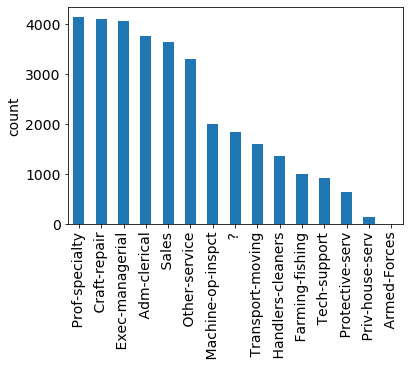

In [61]:
pd.value_counts(df['occupation']).plot.bar()
plt.ylabel('count')
plt.show()

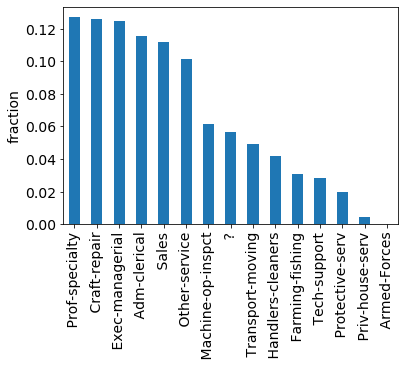

In [62]:
pd.value_counts(df['occupation'],normalize=True).plot.bar()
plt.ylabel('fraction')
plt.show()

## Exercise 1
Loop through each column of the dataframe. If the column type is object (the column is categorical), create a normalized bar plot.

### <font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
   - <font color='LIGHTGRAY'>visualize a categorical column</font>
   - **visualize a continuous column**
   - <font color='LIGHTGRAY'>visualize column pair where one column is continuous and the other one is categorical</font>


In [63]:
print(df['age'].describe())

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64


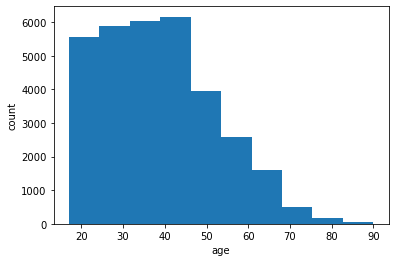

In [3]:
df['age'].plot.hist() # bins = int(np.sqrt(df['age'].count())) # bins = df['age'].nunique()
plt.xlabel('age')
plt.ylabel('count')
plt.show()

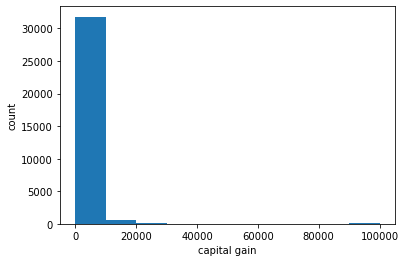

In [5]:
df['capital-gain'].plot.hist() # log=True, bins = np.logspace(np.log10(1),np.log10(np.max(df['capital-gain'])),50)
#plt.semilogx()
plt.xlabel('capital gain')
plt.ylabel('count')
plt.show()

## Exercise 2
Create a histogram of the hours-per-week column!

### <font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
   - <font color='LIGHTGRAY'>visualize a categorical column</font>
   - <font color='LIGHTGRAY'>visualize a continuous column</font>
   - **visualize column pair where one column is continuous and the other one is categorical**


## <center> Overview </center>


| *Visualization types*        	|    column continuous    	| column categorical 	|
|---------------------	|:----------------------:	|:-----------------:	|
| __column continuous__    	| scatter plot, heatmap 	| category-specific histograms, box plot, violin plot |
| __column categorical__   	| category-specific histograms, box plot, violin plot |  stacked bar plot  	|


### Continuous vs. categorical columns
- category-specific histograms

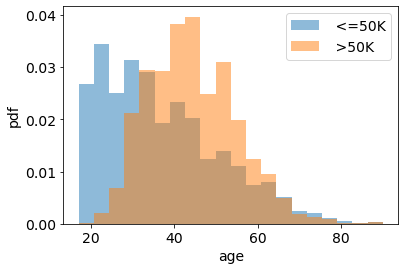

In [71]:
import matplotlib
from matplotlib import pylab as plt

categories = df['gross-income'].unique()
bin_range = (df['age'].min(),df['age'].max())

for c in categories:
    plt.hist(df[df['gross-income']==c]['age'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('pdf')
plt.xlabel('age')
plt.show()

### Continuous vs. categorical columns
- box plot

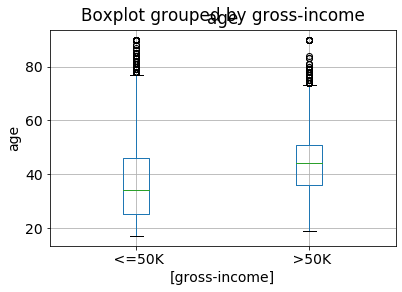

In [72]:
df[['age','gross-income']].boxplot(by='gross-income')
plt.ylabel('age')
plt.show()

### Continuous vs. categorical columns
- violin plot

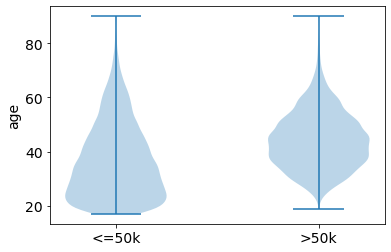

In [73]:
dataset = [df[df['gross-income']==' <=50K']['age'].values,
           df[df['gross-income']==' >50K']['age'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2],['<=50k','>50k'])
plt.ylabel('age')
plt.show()

## Exercise 3
Prepare a category-specific histogram, a box plot, and a violin plot using the gross-income and hours-per-week columns.